In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/body-performance-data/bodyPerformance.csv


#   Body Performance analysis

![](https://media.gqindia.com/wp-content/uploads/2015/12/ashok-vivek-muthuramalingam_running__0.jpg)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv('../input/body-performance-data/bodyPerformance.csv')

In [4]:
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [5]:
data.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [6]:
data.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [8]:
data['age']=data.age.astype(int)
data['height_cm']=data.height_cm.astype(int)
data['weight_kg']=data.weight_kg.astype(int)
data['body fat_%']=data['body fat_%'].astype(int)
data['diastolic']=data.diastolic.astype(int)
data['systolic']=data.systolic.astype(int)
data['gripForce']=data.gripForce.astype(int)

# data visulization

# age

Text(0.5, 0.98, 'Age Count Distripution')

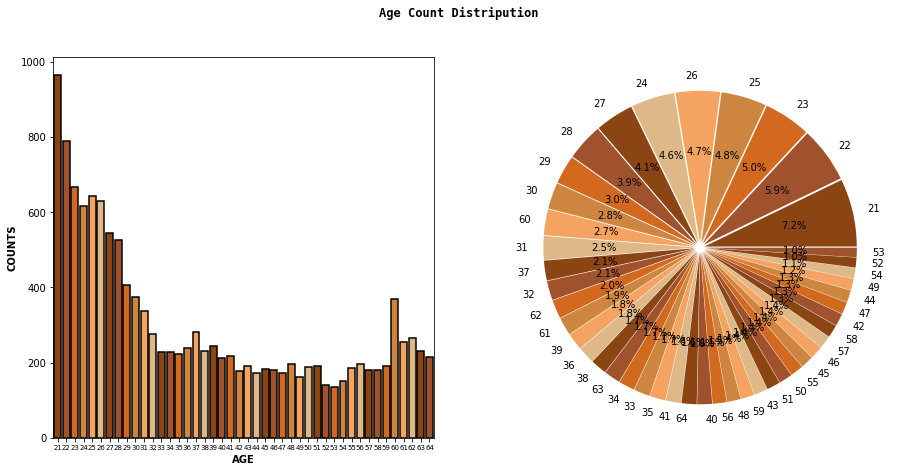

In [9]:
color = ['#8B4513','#A0522D','#D2691E','#CD853F','#F4A460','#DEB887']

fig,ax  = plt.subplots(1,2,figsize=(15,7))
sns.barplot(x=data['age'].value_counts().index,y=data['age'].value_counts().values,palette =color,ax=ax[0],edgecolor = 'black',linewidth=1.5,saturation=1.5)
ax[0].tick_params(axis = 'x',which ='major',labelsize=7)
ax[0].set_xlabel('AGE',weight = 'semibold')
ax[0].set_ylabel('COUNTS',weight = 'semibold')

ax[1].pie(data['age'].value_counts().values,labels = data['age'].value_counts().index,colors = color,autopct = '%1.1F%%',explode = [0.03 for i in data['age'].value_counts().index])
plt.suptitle('Age Count Distripution',weight = 'bold',fontname = 'monospace')

# Gender

Text(0.5, 1.0, 'Gender counts Distripution')

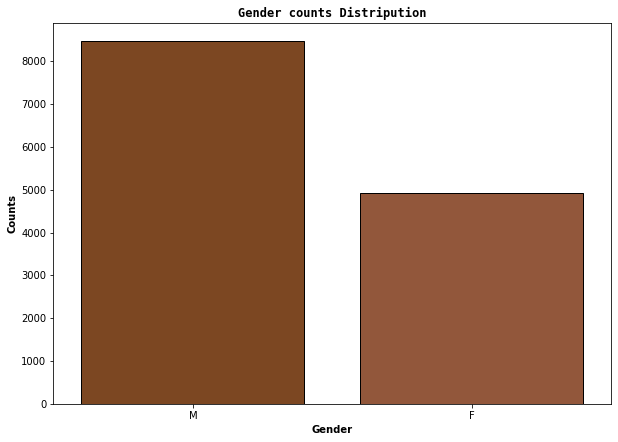

In [10]:
fig = plt.figure(figsize=(10,7))
sns.barplot(x=data['gender'].value_counts().index,y=data['gender'].value_counts().values,palette = color,edgecolor='black')
plt.xlabel('Gender',weight = 'semibold')
plt.ylabel('Counts',weight = 'semibold')
plt.title('Gender counts Distripution',fontname='monospace',weight = 'bold')

# Height

Text(0.5, 1.0, 'Height of Distripution')

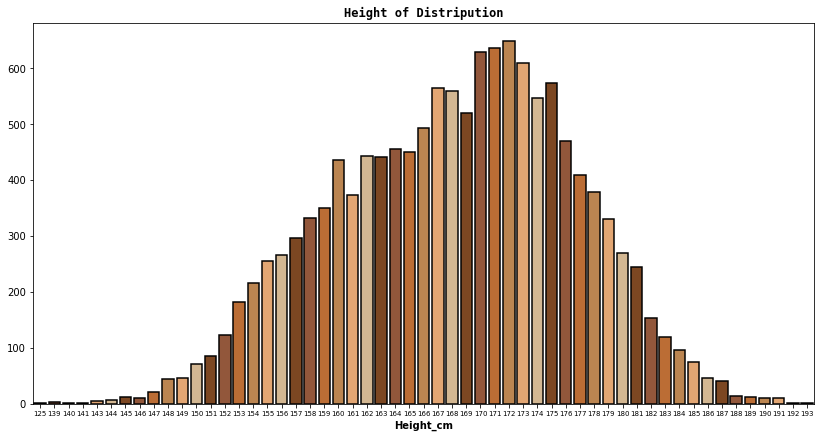

In [11]:
fig = plt.figure(figsize=(14,7))
sns.barplot(x=data['height_cm'].value_counts().index,y=data['height_cm'].value_counts().values,
           palette=color,edgecolor = 'black',linewidth = 1.5)
plt.tick_params(axis ='x',labelsize=7)
plt.xlabel('Height_cm',weight='semibold')
plt.title('Height of Distripution',weight='bold',fontname = 'monospace')

# ******Age vs Height cm******

In [12]:
 height = data[(data['height_cm']>168)]  

In [13]:
height = height.groupby(['age'])['height_cm'].count()

In [14]:
height = height.reset_index()

Text(0.5, 1.0, 'More then 168 cm height Age vis Distripution')

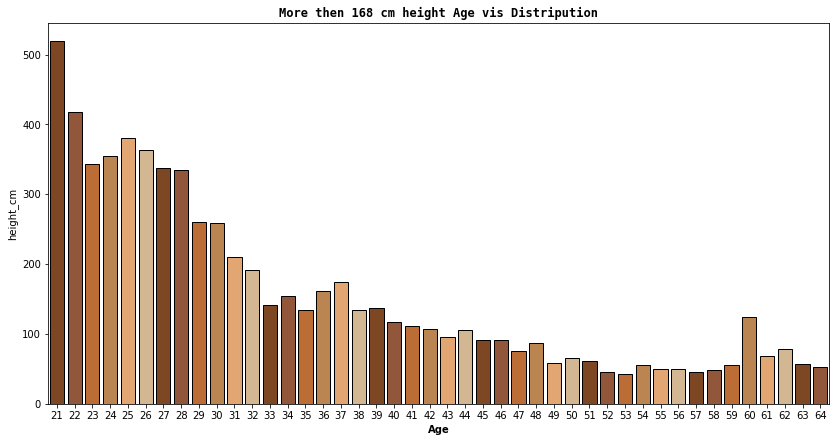

In [15]:
fig = plt.figure(figsize=(14,7))
sns.barplot(x=height['age'],y=height['height_cm'],palette=color,edgecolor='black')
plt.xlabel('Age',weight ='semibold')
plt.title('More then 168 cm height Age vis Distripution',weight = 'bold',fontname='monospace')

# Gender vs height

In [16]:
gender = data[(data['height_cm']>168)]
gender =gender.groupby(['gender'])['height_cm'].count()
gender = gender.reset_index()

Text(0.5, 1.0, 'Which gender more height cm')

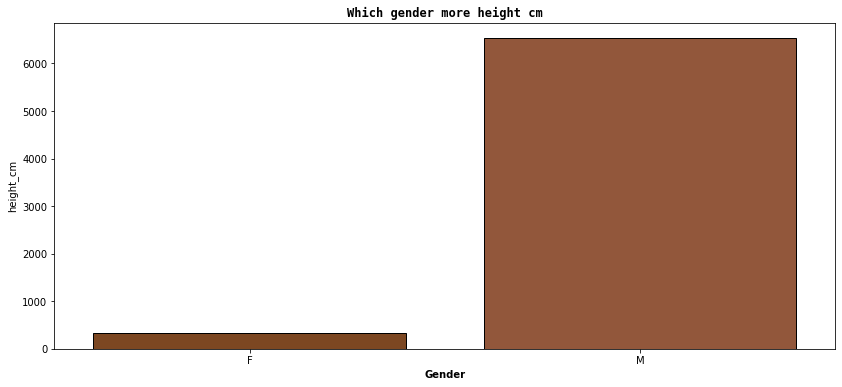

In [17]:
fig =plt.figure(figsize=(14,6))
sns.barplot(x=gender['gender'],y=gender['height_cm'],palette = color,edgecolor='black')
plt.xlabel('Gender',weight='semibold')
plt.title('Which gender more height cm',fontname='monospace',weight='bold')


# Weight kg

Text(0.5, 1.0, 'weight of Distripution')

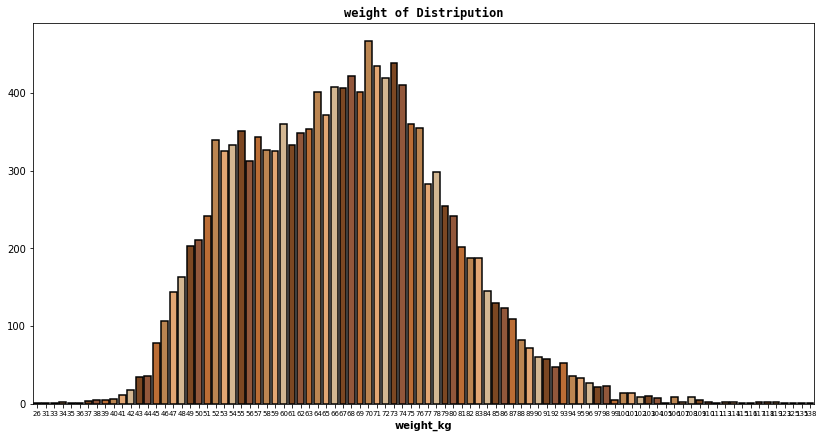

In [18]:
fig = plt.figure(figsize=(14,7))
sns.barplot(x=data['weight_kg'].value_counts().index,y=data['weight_kg'].value_counts().values,
           palette=color,edgecolor = 'black',linewidth = 1.5)
plt.tick_params(axis ='x',labelsize=7)
plt.xlabel('weight_kg',weight='semibold')
plt.title('weight of Distripution',weight='bold',fontname = 'monospace')

# Body fat vs gender

![](https://images.squarespace-cdn.com/content/v1/54a9bf74e4b0891d14c7561e/1603662758207-UWNILVZFP8FR7KWO44UQ/Body+fat+percentage+chart+-+women?format=500w)

![](https://images.squarespace-cdn.com/content/v1/54a9bf74e4b0891d14c7561e/1603662796024-41RG2UJ0WGAK3GU1OYCU/Body+fat+percentage+chart+-+men?format=500w)

In [19]:
print(data['body fat_%'].mean())
print(data['body fat_%'].min())
print(data['body fat_%'].max())

22.794818188605987
3
78


In [20]:
female = data[(data['gender'] =='F')]

In [21]:
femalefat = female[(female['body fat_%']  >= 22)]

Text(0.5, 1.0, 'Counts of Famale Excess Fat')

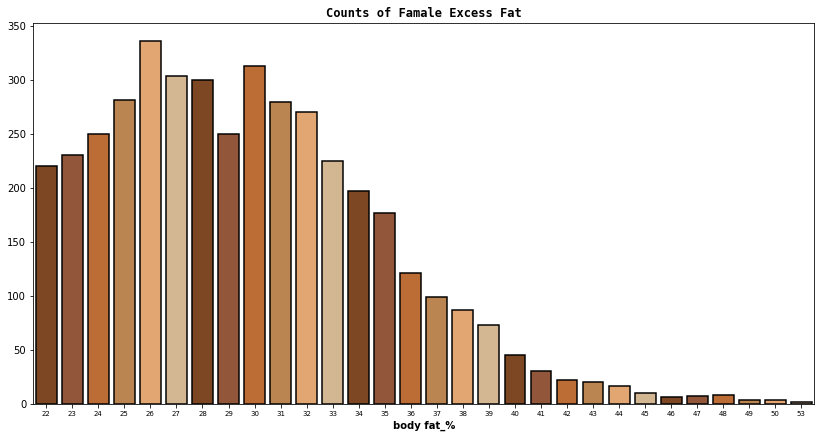

In [22]:
fig = plt.figure(figsize=(14,7))
sns.barplot(x=femalefat['body fat_%'].value_counts().index,y=femalefat['body fat_%'].value_counts().values,
           palette=color,edgecolor = 'black',linewidth = 1.5)
plt.tick_params(axis ='x',labelsize=7)
plt.xlabel('body fat_%',weight='semibold')
plt.title('Counts of Famale Excess Fat',weight='bold',fontname = 'monospace')

In [23]:
malefat = data[(data['gender'] =='M')]
malefat = malefat[(malefat['body fat_%']  >= 20)]

Text(0.5, 1.0, 'Counts of Male Excess Fat')

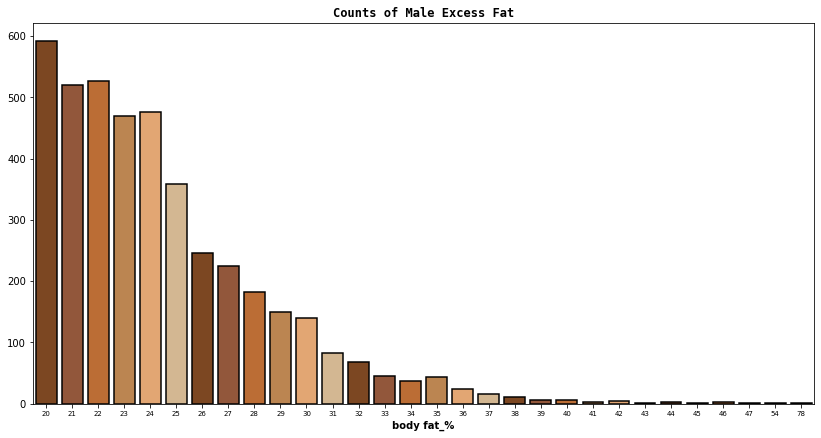

In [24]:
fig = plt.figure(figsize=(14,7))
sns.barplot(x=malefat['body fat_%'].value_counts().index,y=malefat['body fat_%'].value_counts().values,
           palette=color,edgecolor = 'black',linewidth = 1.5)
plt.tick_params(axis ='x',labelsize=7)
plt.xlabel('body fat_%',weight='semibold')
plt.title('Counts of Male Excess Fat',weight='bold',fontname = 'monospace')

# diastolic blood pressure

Blood pressure consists of two numbers. Systolic pressure, the force exerted on blood vessels when the heart beats, is the upper number. Diastolic pressure, the force exerted when the heart is at rest, is on the bottom — in more ways than one. Systolic pressure attracts the lion’s share of attention from physicians and patients, says UAB cardiologist Jason Guichard, M.D., Ph.D.****

# A diastolic blood pressure of somewhere between 90 and 60 is good

In [25]:
print(data['diastolic'].max())
print(data['diastolic'].min())
print(data['diastolic'].mean())
print(data['diastolic'].median())

156
0
78.79675950123199
79.0


In [26]:
high = data[(data['diastolic'] >90)]
low = data[(data['diastolic'] < 90)]

Text(0.5, 0.98, 'Diastolic Hight and Low Distripution')

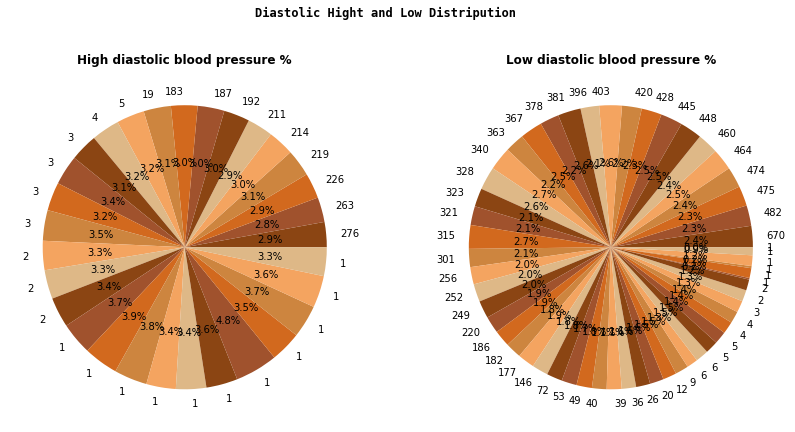

In [27]:
fig,ax = plt.subplots(1,2,figsize=(14,7))
ax[0].pie(high['diastolic'].value_counts().index,labels=high['diastolic'].value_counts().values,colors=color,autopct='%1.1F%%')
ax[0].set_title('High diastolic blood pressure %',weight='semibold')
ax[1].pie(low['diastolic'].value_counts().index,labels=low['diastolic'].value_counts().values,colors=color,autopct='%1.1F%%')
ax[1].set_title('Low diastolic blood pressure %',weight='semibold')
plt.suptitle('Diastolic Hight and Low Distripution',weight='bold',fontname='monospace')

# broad jump cm

In [28]:
data['broad jump_cm']=data['broad jump_cm'].astype(int)

Text(0.5, 1.0, 'broad jump_cm Distripution')

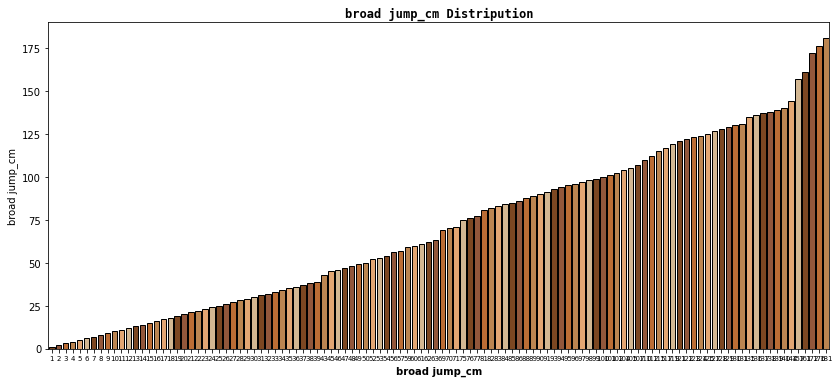

In [29]:
fig = plt.figure(figsize=(14,6))
sns.barplot(x=data['broad jump_cm'].value_counts(),y=data['broad jump_cm'].value_counts(),palette=color,edgecolor='black',
           )
plt.tick_params(axis='x',labelsize=7)
plt.xlabel('broad jump_cm',weight='semibold')
plt.title('broad jump_cm Distripution',weight='bold',fontname='monospace')

# Class

In [30]:
x=data['class'].value_counts()
x=pd.DataFrame(x)

Text(0.5, 1.0, 'All class Distripution')

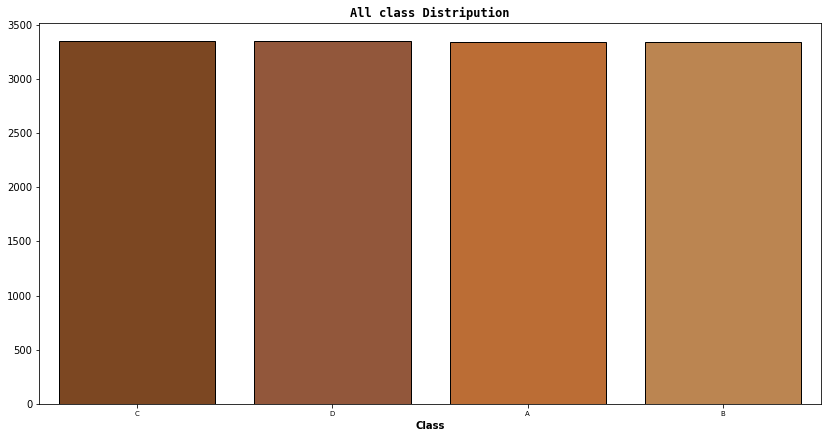

In [31]:
fig = plt.figure(figsize=(14,7))
sns.barplot(x=data['class'].value_counts().index,y=data['class'].value_counts().values,
           palette=color,edgecolor = 'black')
plt.tick_params(axis ='x',labelsize=7)
plt.xlabel('Class',weight='semibold')
plt.title('All class Distripution',weight='bold',fontname = 'monospace')

# Gender vs class

In [32]:
maleclass = data[(data['gender']=='M')]
femaleclass = data[(data['gender']=='F')]

Text(0.5, 0.98, 'All THE CLASSES OF MALE AND FEMALE')

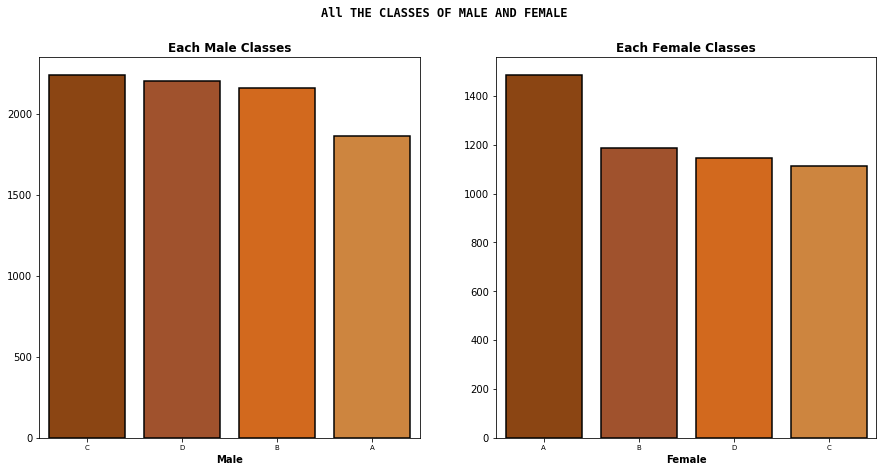

In [33]:
fig,ax  = plt.subplots(1,2,figsize=(15,7))
sns.barplot(x=maleclass['class'].value_counts().index,y=maleclass['class'].value_counts().values,palette =color,ax=ax[0],edgecolor = 'black',linewidth=1.5,saturation=1.5)
ax[0].tick_params(axis = 'x',which ='major',labelsize=7)
ax[0].set_xlabel('Male',weight = 'semibold')
ax[0].set_title('Each Male Classes',weight='semibold')
sns.barplot(x=femaleclass['class'].value_counts().index,y=femaleclass['class'].value_counts().values,palette =color,ax=ax[1],edgecolor = 'black',linewidth=1.5,saturation=1.5)
ax[1].tick_params(axis = 'x',which ='major',labelsize=7)
ax[1].set_xlabel('Female',weight = 'semibold')
ax[1].set_title('Each Female Classes',weight='semibold')
plt.suptitle('All THE CLASSES OF MALE AND FEMALE',weight='bold',fontname='monospace')

# conclusion

moslty body fit male age 21 mostlt start tha fitnss.
hight 170 to 174,
digstic blood pressure higher male.
fat % also high in male and female also
but class A moslty Female..